# Exploratory Data Analysis 

This project will explore a heart failure prediction dataset. Cardiovascular disease is the number one cause of death globally, takes over 17.9 million lives annually, and accounts for 31 % of worldwide deaths. The dataset explored in this project is the largest heart disease dataset for research purposes, it originates from 5 other datasets, contains over 11 common feautures, and 900 observations. The dataset is of value, as it can be used to create an early detection and management system with a machine learning model.  

The goal of this project is to conduct exploratory analysis on the heart failure prediction dataset. The project consists of four steps and has various requirements in each step. Step one consists of selecting a real world dataset, step two requires performing data preparation and cleaining, step 3 requires exploratory analysis and visualization. In step 4 questions about the data will be presented in addition to solution to those questions. To start, various libraries will be imported. 



In [2]:
#import require libraries 
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

The csv file needs to be downloaded using the pandas library. 

In [3]:
# download dataset into a pandas df 
data_dir = './heart-failure-prediction/'
heart_df = pd.read_csv(data_dir + "/heart.csv")


In [4]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Step 2, Data Preparation and Cleaning

Here, information on columns, rows, and null values will be explored. 
 

In [5]:
# info command can be used to get the number of columns in the frame, the data type, and the null value count
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The dataset has 918 obervations, 12 columns, and no null values. The dataset is composed of numerical data, and object data which comes from categorical responses. 

Lets confirm this with a shape command, and by enumerating the columns in the dataset. 

In [10]:
#shape command can be used to get information on columns and rows. 
heart_df_number_of_rows = heart_df.shape[0]
heart_df_number_of_columns = heart_df.shape[1]


In [11]:
print('The heart datset contains {} rows.'.format(heart_df_number_of_rows))
print('The heart datset contains {} columns'.format(heart_df_number_of_columns))

The heart datset contains 918 rows.
The heart datset contains 12 columns


In [312]:
# The position of the columns and the names of the columns can be printed. 
columns = list(heart_df.columns)
for i, val in enumerate(columns):
    print('The column at position {} is {}.'.format(i, val))

The column at position 0 is Age.
The column at position 1 is Sex.
The column at position 2 is ChestPainType.
The column at position 3 is RestingBP.
The column at position 4 is Cholesterol.
The column at position 5 is FastingBS.
The column at position 6 is RestingECG.
The column at position 7 is MaxHR.
The column at position 8 is ExerciseAngina.
The column at position 9 is Oldpeak.
The column at position 10 is ST_Slope.
The column at position 11 is HeartDisease.


Lets get a view of the first ten rows of the dataset, the last ten rows, and a random sample of rows from the dataset. 

In [313]:
#The head command returns the first ten rows of the dataset. 
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [314]:
#The tail command returns the ten last rows of the dataset. 
heart_df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [315]:
#The sample command returns 10 random rows from the dataset. 
heart_df.sample(10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
427,59,M,ASY,140,0,0,ST,117,Y,1.0,Flat,1
674,62,M,ATA,120,281,0,LVH,103,N,1.4,Flat,1
819,55,M,ASY,160,289,0,LVH,145,Y,0.8,Flat,1
121,52,F,NAP,125,272,0,Normal,139,N,0.0,Up,0
291,47,F,ATA,140,257,0,Normal,135,N,1.0,Up,0
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
657,44,M,NAP,130,233,0,Normal,179,Y,0.4,Up,0
661,49,M,NAP,118,149,0,LVH,126,N,0.8,Up,1
645,57,M,NAP,128,229,0,LVH,150,N,0.4,Flat,1
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0


Lets test for null values, duplicate values, and obtain a value count of the data types in the columns. 

In [316]:
#isnull can be used to identify null values 
null_values = heart_df.isnull()
null_values.value_counts()

Age    Sex    ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
False  False  False          False      False        False      False       False  False           False    False     False           918
dtype: int64

In [334]:
# To test for duplicate values. 
duplicates = heart_df.duplicated()
duplicates.unique()

array([False])

In [335]:
#To check datatypes 
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [336]:
#dtype and value count 
data_types = heart_df.dtypes
data_types.value_counts()

int64      6
object     5
float64    1
dtype: int64

Lets perform some descriptive statistics on the data 

In [322]:
#mean, sum, range, and other interesting statistics for numeric columns 
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Lets perform group descriptive statistics. 

In [323]:
#descriptive statistics using the grouby function can be performed. 
functions = ['mean', 'min', 'max', 'median']
grouped = heart_df.groupby(['Sex', 'HeartDisease'])


In [337]:
#Aggregate functions can be computed with the grouped object. 
grouped.agg(functions)

Age                  RestingBP                  \
                       mean min max median        mean min  max median   
Sex HeartDisease                                                         
F   0             51.202797  30  76   51.0  128.790210  94  180  130.0   
    1             56.180000  33  73   58.0  142.000000  95  200  139.0   
M   0             50.202247  28  75   51.0  130.925094  80  190  130.0   
    1             55.868996  31  77   57.0  133.331878   0  200  131.0   

                 Cholesterol      ... FastingBS              MaxHR           \
                        mean min  ...       max median        mean min  max   
Sex HeartDisease                  ...                                         
F   0             247.440559   0  ...         1    0.0  149.048951  90  192   
    1             223.340000   0  ...         1    0.0  137.820000  90  174   
M   0             216.239700   0  ...         1    0.0  147.670412  69  202   
    1             170.766376   0  ...         1    0.0  126.545852  60  195   

                          Oldpeak                   
                 median      mean  min  max median  
Sex HeartDisease                                    
F   0             152.0  0.435664  0.0  2.6    0.0  
    1             142.5  1.336000  0.0  6.2    1.0  
M   0             150.0  0.393258 -1.1  4.2    0.0  
    1             125.0  1.267467 -2.6  5.6    1.2  

[4 rows x 24 columns]

In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

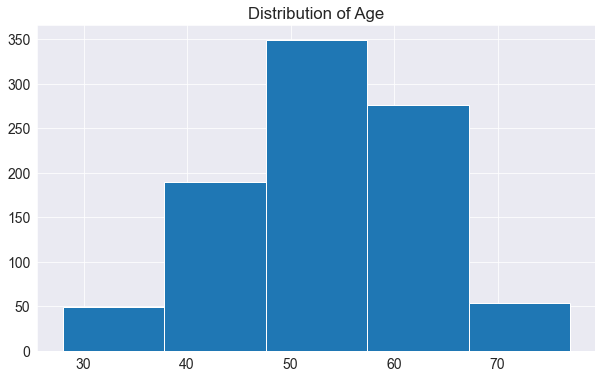

In [10]:
plt.title("Distribution of Age")

plt.hist(heart_df.Age, bins=5);

/Users/frankyalma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



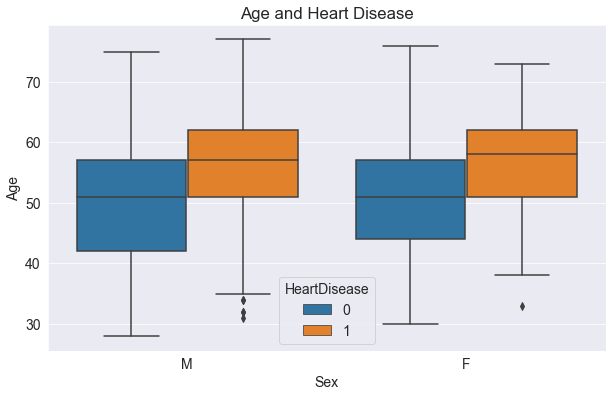

In [341]:
# Chart title
plt.title("Age and Heart Disease")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(heart_df.Sex, heart_df.Age, hue=heart_df.HeartDisease);

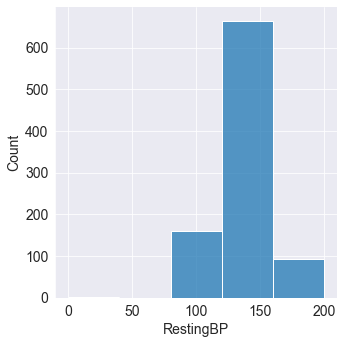

In [240]:
sns.displot(heart_df.RestingBP, bins=5, kde=False);

/Users/frankyalma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



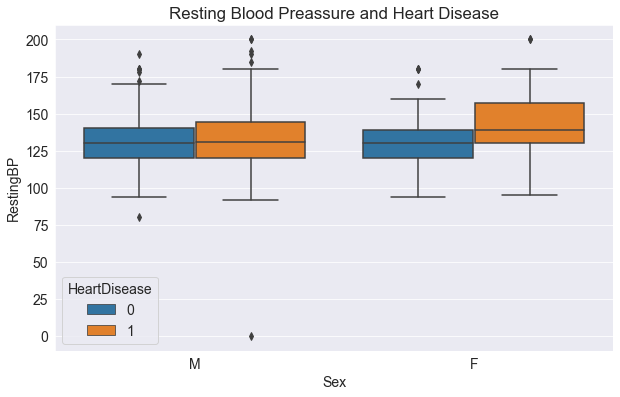

In [247]:
# Chart title
plt.title("Resting Blood Preassure and Heart Disease")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(heart_df.Sex, heart_df.RestingBP, hue=heart_df.HeartDisease);

In [ ]:
# Chart title
plt.title("Cholesterol and Heart Disease")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(heart_df.Sex, heart_df.Age, hue=heart_df.HeartDisease);

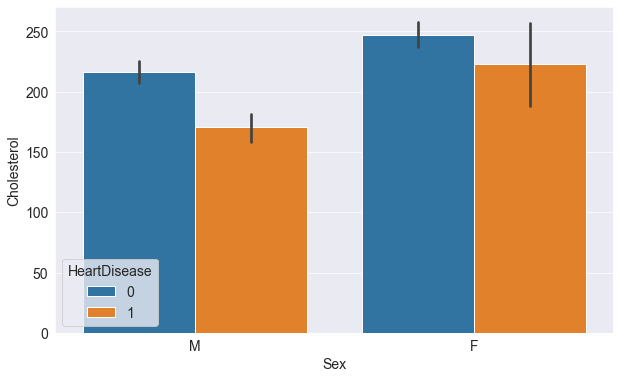

In [249]:
sns.barplot(x='Sex', y='Cholesterol', hue='HeartDisease', data=heart_df);

/Users/frankyalma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



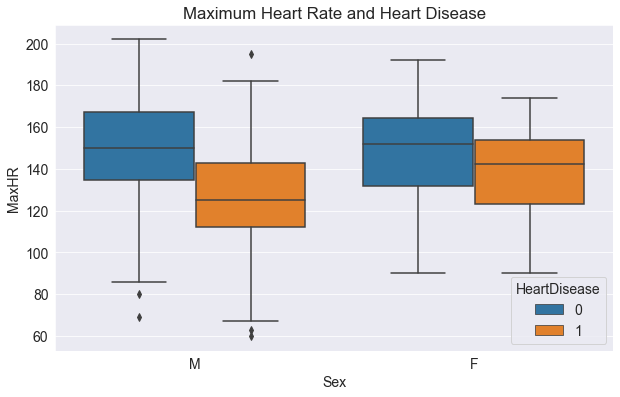

In [243]:
# Chart title
plt.title("Maximum Heart Rate and Heart Disease")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(heart_df.Sex, heart_df.MaxHR, hue=heart_df.HeartDisease);

/Users/frankyalma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



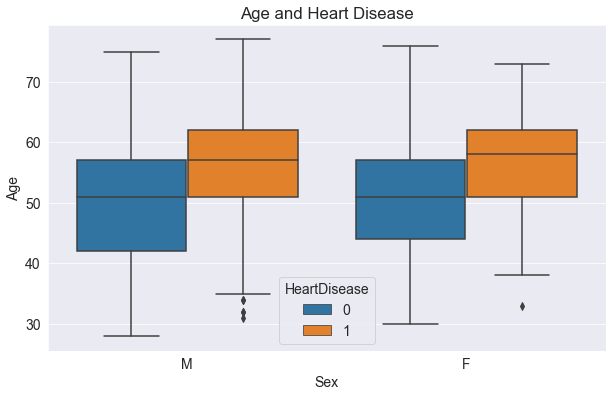

In [244]:
# Chart title
plt.title("Age and Heart Disease")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(heart_df.Sex, heart_df.Age, hue=heart_df.HeartDisease);

/Users/frankyalma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



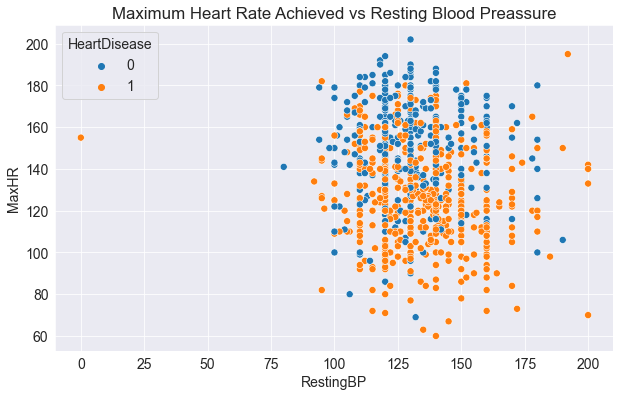

In [224]:
# Create a scatter plot
sns.scatterplot(heart_df.RestingBP, # X-axis
                heart_df.MaxHR,  # Y-axis
                hue=heart_df.HeartDisease,  # Dot color
                s=50);

# Chart title
plt.title("Maximum Heart Rate Achieved vs Resting Blood Preassure");

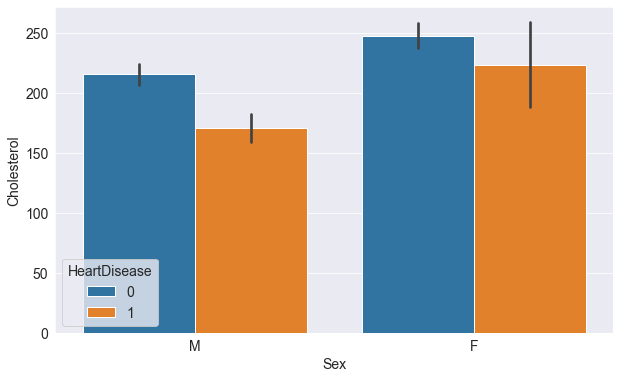

In [40]:
sns.barplot(x='Sex', y='Cholesterol', hue='HeartDisease', data=df);


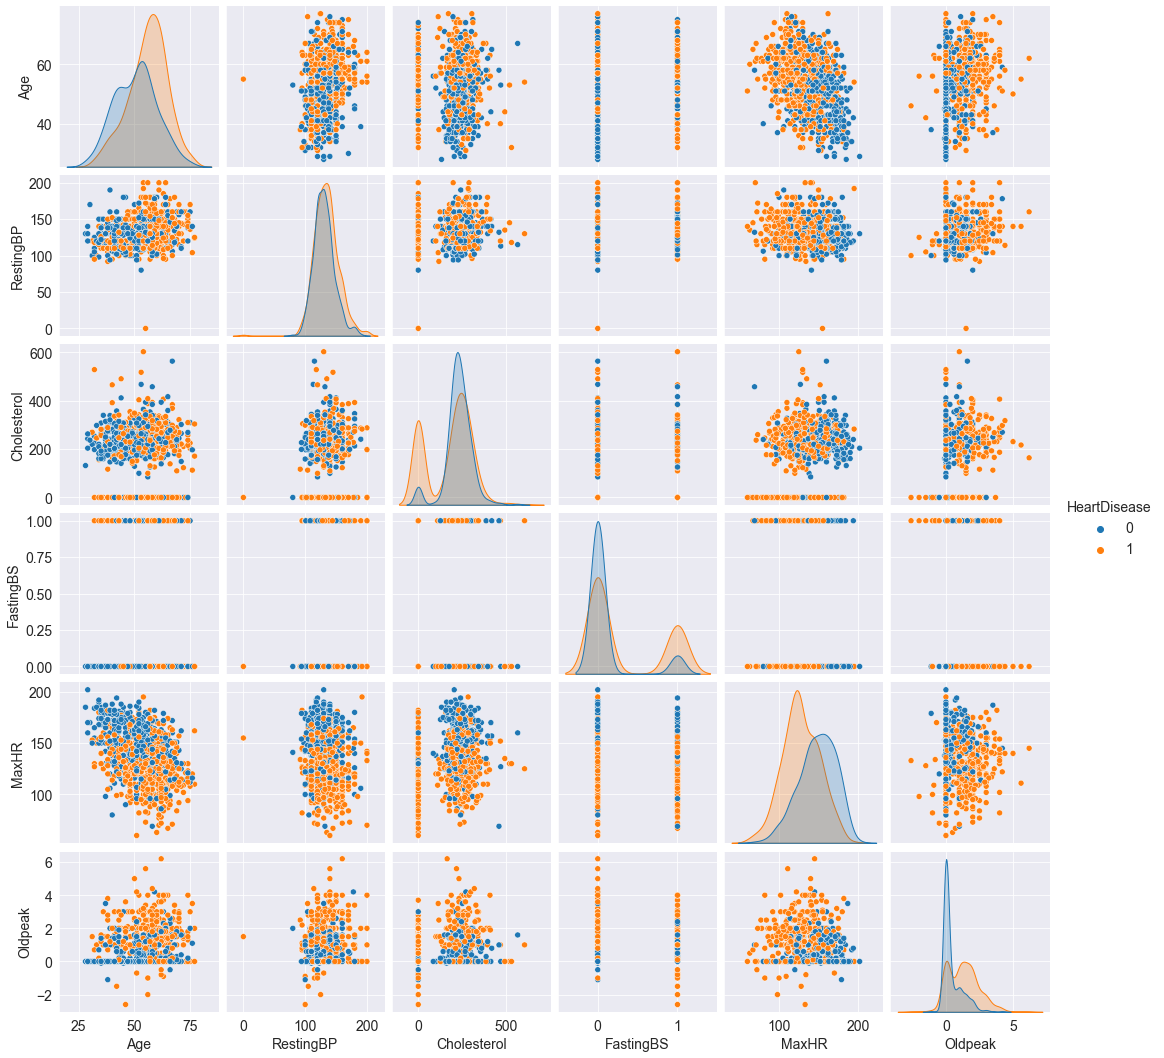

In [43]:
sns.pairplot(df, hue='HeartDisease')

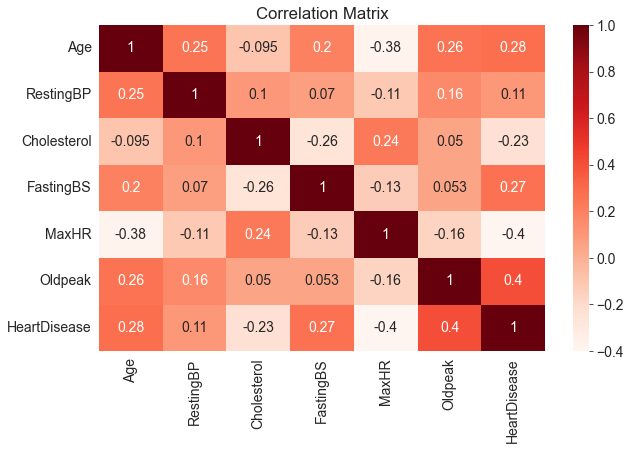

In [250]:
sns.heatmap(heart_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

 Observations

1. Age follows a normal distribution pattern, and a higher average in cases of heart disease can be seen.
2. In cases of heart disease, resting blood preassure has a higher average for both male and female. 
3. Cholesterol in cases of heart disease have a lower average then in cases without heart disease. 
4. Cases of heart disease seem to cluster in cases where blood preasure is in the 125 to 150 range, and the maximum heart rate range is in the 100 to 140 rate. 
5. Heart disease cases seem to differ distinctly when Cholesterol, age, and maximum heart rate are involved. 





# Step 4
In this section, 4 questions about the dataset will be presented. Next, the results will be computed using pandas, and Matplotlib/Seaborn will be used to help answer questions about the data. 

Questions 
1. Is there a statistical significant association between heart disease and gender.
2. what has a stronger correlation to heart disease, resting bp or Max Hr.
3. Does cholesterol share the strongest correlation to heart disease.
4. Is there a type of chest pain more closely associated with heart disease. 

In [342]:
# To measure association a chi square test can be computed. Heart Disease can be the response varible 
# Sex, can be the explanatory variable. 

In [49]:
#import the scipy library to run a chi square test on two categorical variables. 
from scipy.stats import chi2_contingency


In [50]:
# Create a contingency table which shows frequencies for particular combinations. 
contingency = pd.crosstab(df['Sex'], df['HeartDisease'])
contingency

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


In [51]:
# create a contingency table showing percentages instead of frequencies. 
contigency_pct = pd.crosstab(df['Sex'], df['HeartDisease'], normalize='index')
contigency_pct

HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


<AxesSubplot:xlabel='HeartDisease', ylabel='Sex'>

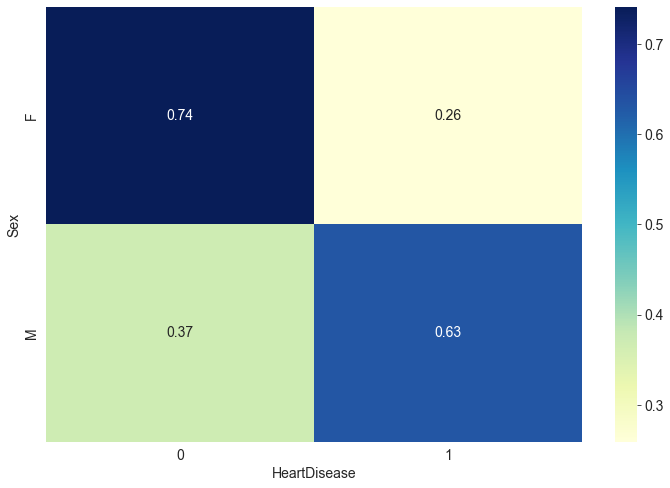

In [343]:
#visualize the contingency tables
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")

In [344]:
# Compute the Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contingency)

In [345]:
p < .05

True

In [58]:
# Since the p value is less then .05, null hypothesis can be rejected and null accepted for Q1 

In [346]:
question_1_conclusion = ('There is a statistical significant association between heart disease and gender.')
question_1_conclusion

'There is a statistical significant association between heart disease and gender.'

In [347]:
question_2

'what has a stronger correlation to heart disease, resting bp or Max Hr?'

In [74]:
sliced_df = heart_df[['RestingBP', 'MaxHR', 'HeartDisease']]

In [77]:
sliced_df.corr()

,RestingBP,MaxHR,HeartDisease
RestingBP,1.000000,-0.112135,0.107589
MaxHR,-0.112135,1.000000,-0.400421
HeartDisease,0.107589,-0.400421,1.000000


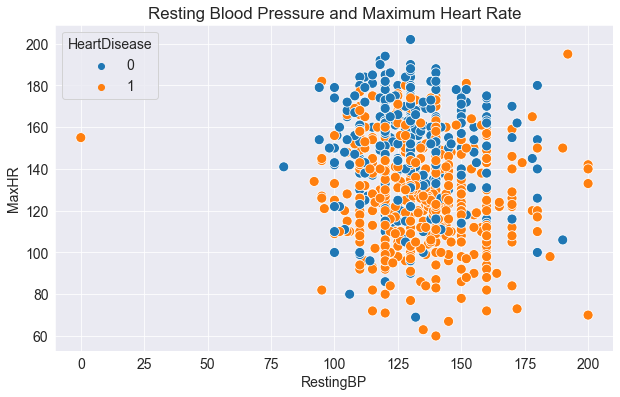

In [350]:
plt.title('Resting Blood Pressure and Maximum Heart Rate')
sns.scatterplot(x=df.RestingBP, y=df.MaxHR, hue=df.HeartDisease, s=100);


In [82]:
resting_bmp_corr_result = sliced_df.HeartDisease.corr(sliced_df.RestingBP)
resting_bmp_corr_result

0.10758898037140383

In [83]:
max_HR_corr_result = sliced_df.HeartDisease.corr(sliced_df.MaxHR)
max_HR_corr_result

-0.4004207694631896

In [348]:
print("Maximum Heart Rate and heart disease have a {:.2f} % correlation.".format(max_HR_corr_result))
print("Resting Blood preassure and heart disease have a {:.2f} % correlation.".format(resting_bmp_corr_result))

Maximum Heart Rate and heart disease have a -0.40 % correlation.
Resting Blood preassure and heart disease have a 0.11 % correlation.


Next, is question 3 where we will explore how the variable correlate to heart disease. 

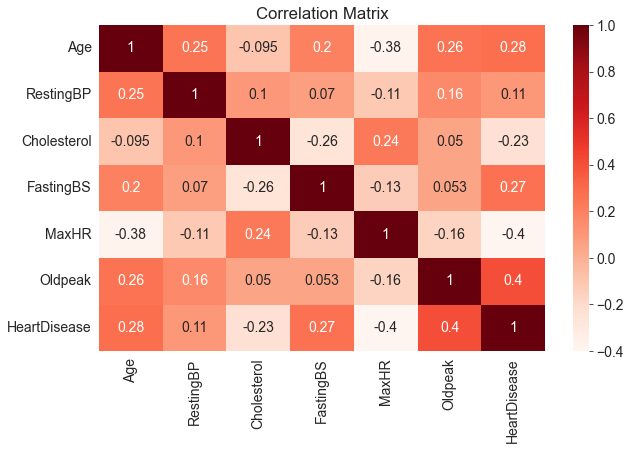

In [351]:
sns.heatmap(heart_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [359]:
correlation_results = heart_df.corr()
correlation_results

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [361]:
correlation_results.HeartDisease.sort_values(ascending=False)


HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

It seems that Oldpeak has the strongest positive correlation and Maximum Heart Rate the strongest negative correlation. 

The final question will look at chest pain types and if there is a statistically significant relationship to the heart disease variables. The test computed will be chi square. 

In [363]:
# A contingency table will be created
contingency_chestpain = pd.crosstab(df['ChestPainType'], df['HeartDisease'])
contingency_chestpain

HeartDisease,0,1
ChestPainType,,
ASY,104,392
ATA,149,24
NAP,131,72
TA,26,20


In [290]:
#percentage contingency table for chest pain 
contigency_pct_chestpain = pd.crosstab(df['ChestPainType'], df['HeartDisease'], normalize='index')
contigency_pct_chestpain

HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


<AxesSubplot:xlabel='HeartDisease', ylabel='ChestPainType'>

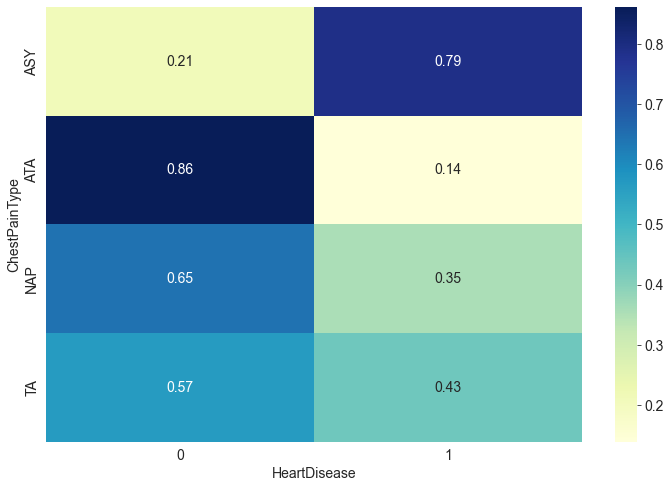

In [366]:
# Visual for chest pain and heart disease 
#visualize contingency tables 
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct_chestpain, annot=True, cmap="YlGnBu")

In [367]:
most_at_risk_chest_pain = ("ASY")
least_at_risk_chest_pain = ("ATA")

In [368]:
print("{} occurs in the most amount of cases in heart disease.".format(most_at_risk_chest_pain))
print("{} occurs the least amount in cases of heart disease.".format(least_at_risk_chest_pain))

ASY occurs in the most amount of cases in heart disease.
ATA occurs the least amount in cases of heart disease.


In [34]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


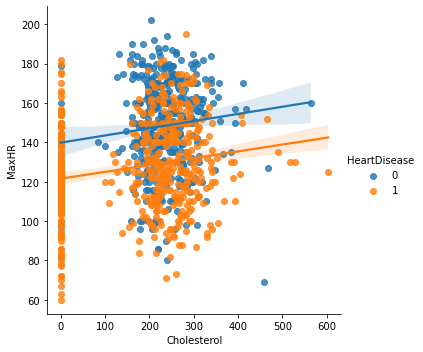

In [33]:
sns.lmplot(x="Cholesterol", y="MaxHR", hue="HeartDisease", data=heart_df);


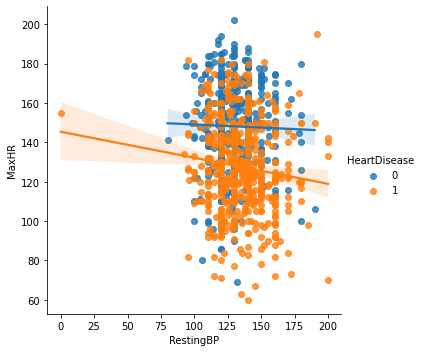

In [32]:
sns.lmplot(x="RestingBP", y="MaxHR", hue="HeartDisease", data=heart_df);


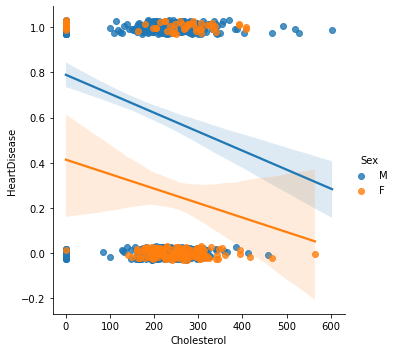

In [41]:
sns.lmplot(x="Cholesterol", y="HeartDisease", data=heart_df,
           y_jitter=.03, hue="Sex");

In [ ]:
ExerciseAngina

In [ ]:
Is there a positive or negative relationship between maximum heart rate and age. 

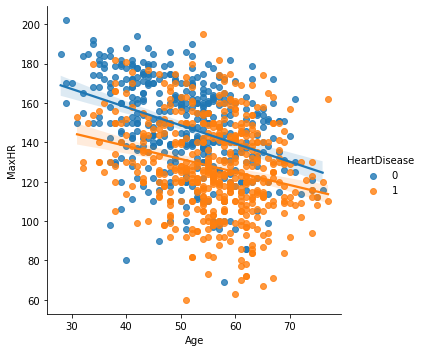

In [43]:
sns.lmplot(x="Age", y="MaxHR", hue="HeartDisease", data=heart_df);


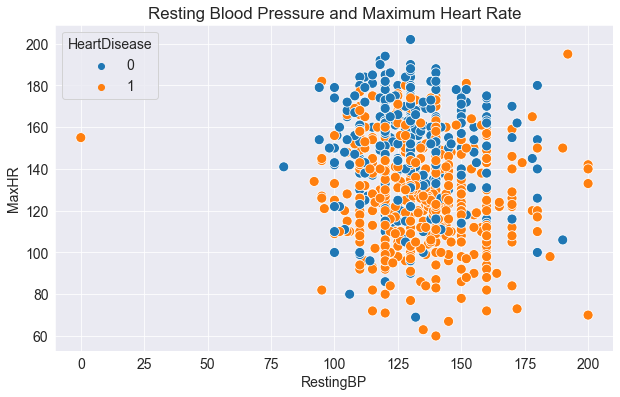

In [11]:


plt.title('Resting Blood Pressure and Maximum Heart Rate')
ax = sns.scatterplot(x=heart_df.RestingBP, y=heart_df.MaxHR, hue=heart_df.HeartDisease, s=100);


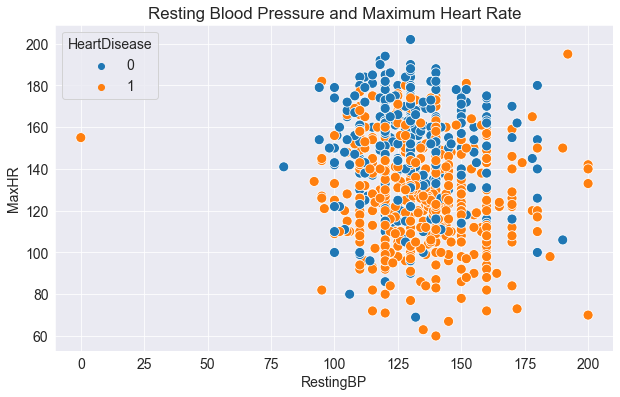

In [16]:
#Resting Blood Preassure and maximum heart rate
plt.title('Resting Blood Pressure and Maximum Heart Rate')
sns.scatterplot(x=heart_df.RestingBP, y=heart_df.MaxHR, hue=heart_df.HeartDisease, s=100);


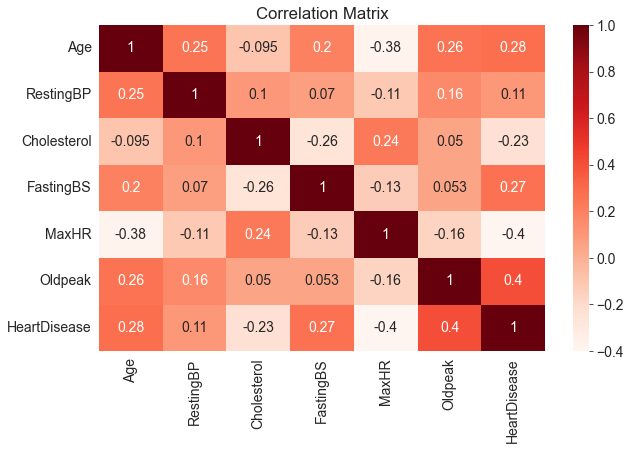

In [15]:
#Correlation Matrix 
sns.heatmap(heart_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

/Users/frankyalma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


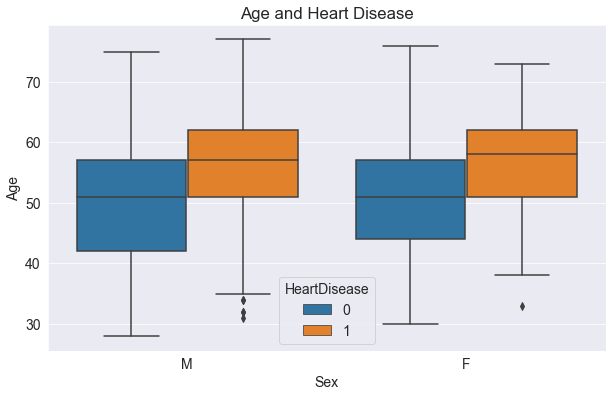

In [19]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(heart_df.Sex, heart_df.Age, hue=heart_df.HeartDisease);
plt.title("Age and Heart Disease");